# Plotting and statistical packages

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston

import statsmodels.api as sm
from statsmodels.formula.api import ols

sns.set()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Boston housing prices

In [3]:
# scikit-learn dataset
df_dict = load_boston()
print(df_dict['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
features = pd.DataFrame(data=df_dict.data, columns = df_dict.feature_names)
target = pd.DataFrame(data=df_dict.target, columns = ['MEDV'])

In [5]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df = pd.concat([features, target], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
for col in df.columns:
    print(col, df[col].nunique())

CRIM 504
ZN 26
INDUS 76
CHAS 2
NOX 81
RM 446
AGE 356
DIS 412
RAD 9
TAX 66
PTRATIO 46
B 357
LSTAT 455
MEDV 229


## Pandas Plotting

In [8]:
from pandas.tools.plotting import scatter_matrix

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002875DC58940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028768EFEDD8>]], dtype=object)

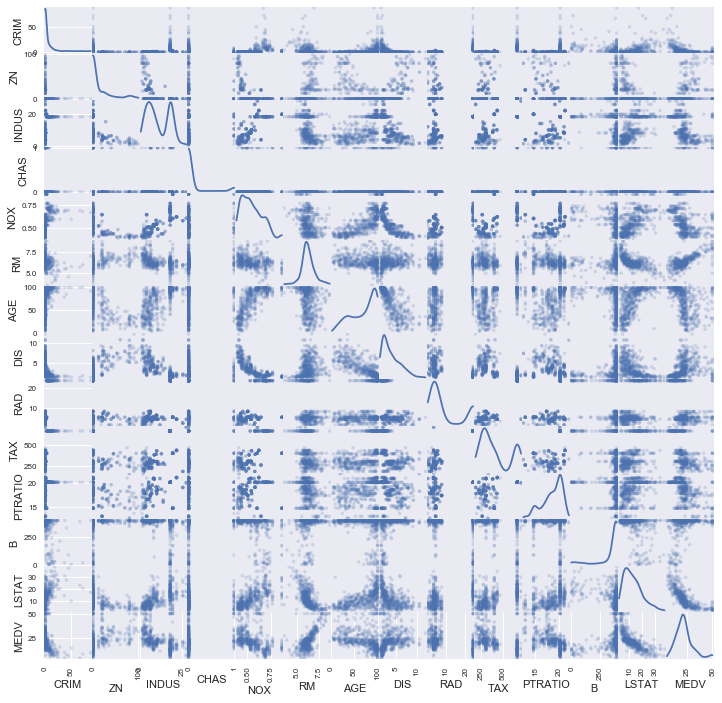

In [9]:
fig, ax = plt.subplots(figsize=(12, 12))
scatter_matrix(df, alpha=0.2, diagonal='kde', ax=ax)

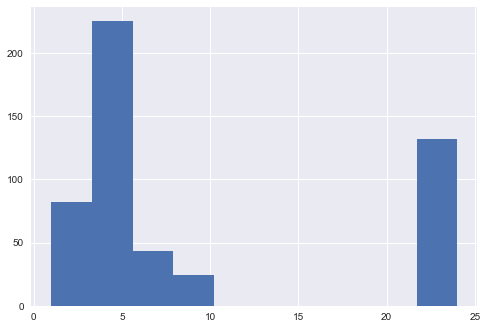

In [10]:
df['RAD'].hist()

In [11]:
df['RAD_bool'] = df['RAD'].apply(lambda x: x > 15).astype('bool')

In [12]:
type(df.RAD_bool.iloc[0])

numpy.bool_

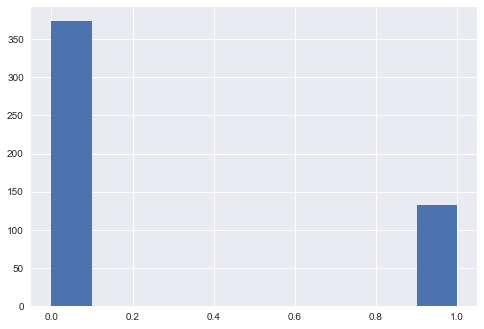

In [13]:
df.RAD_bool.hist()

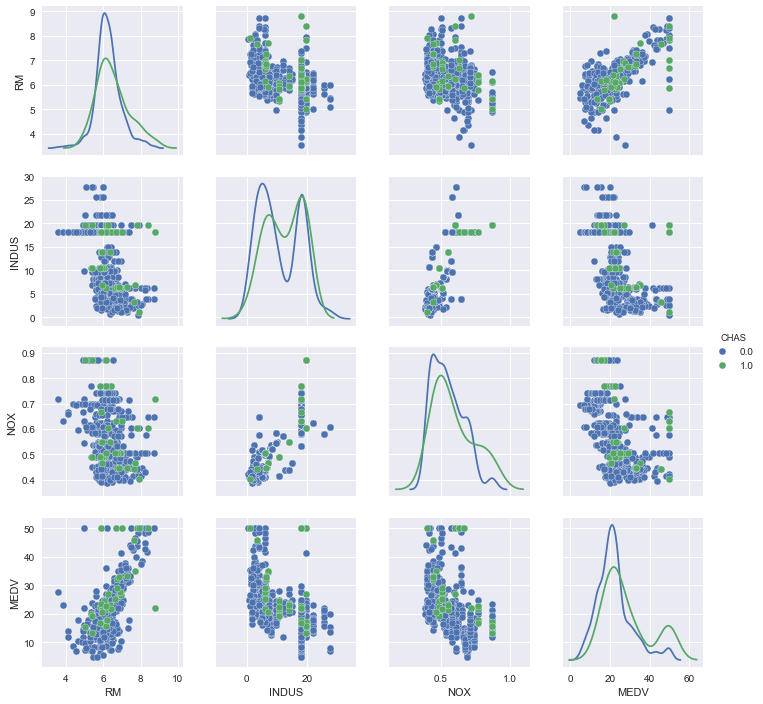

In [14]:
sns.pairplot(df, hue="CHAS", vars=["RM", "INDUS", "NOX", "MEDV"], diag_kind='kde')

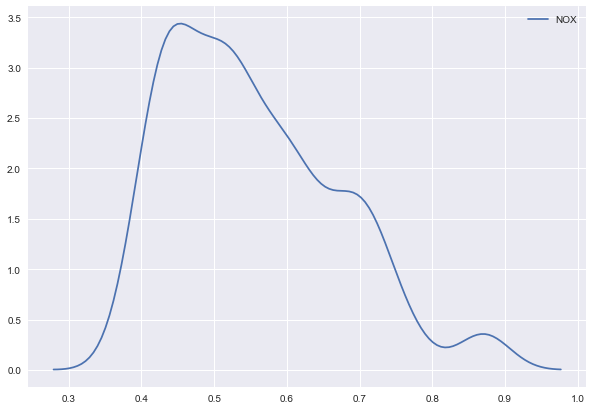

In [15]:
# Target variable
fig, ax = plt.subplots(figsize=(10,7))
sns.kdeplot(df.NOX)

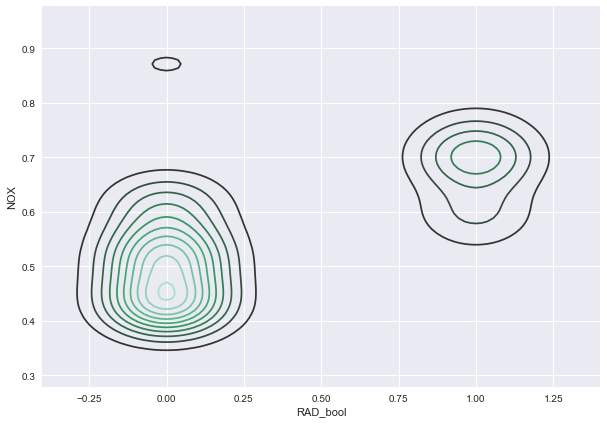

In [16]:
fig, ax = plt.subplots(figsize=(10,7))
sns.kdeplot(df.RAD_bool, df.NOX)

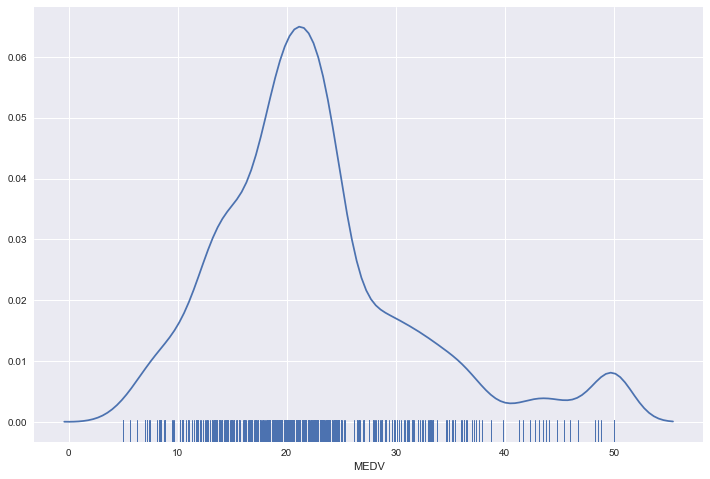

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(target.MEDV, ax=ax, rug=True, hist=False)

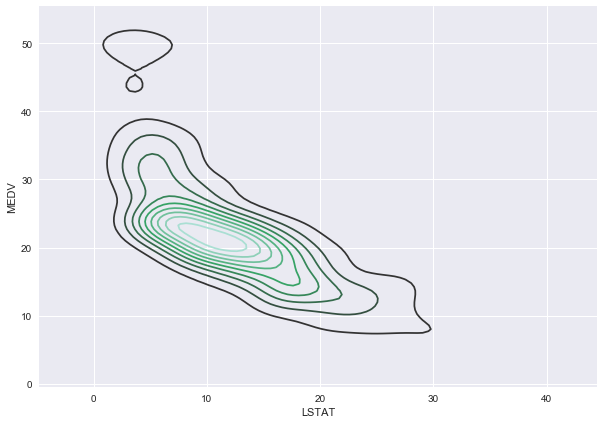

In [20]:
fig, ax = plt.subplots(figsize=(10,7))
sns.kdeplot(df.LSTAT, df.MEDV, ax=ax)

## Statsmodels

In [19]:
mod = ols(formula='''MEDV ~ LSTAT + 1''', data=df).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 06 Sep 2017   Prob (F-statistic):           5.08e-88
Time:                        21:38:54   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
mod = ols(formula='''MEDV ~ I(np.log(LSTAT)) + 1''', data=df).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1000.
Date:                Wed, 06 Sep 2017   Prob (F-statistic):          9.28e-122
Time:                        21:40:35   Log-Likelihood:                -1563.6
No. Observations:                 506   AIC:                             3131.
Df Residuals:                     504   BIC:                             3140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           52.1248      0.965     54.004      0.000      50.228      54.021
I(np.log(LSTAT))   -12.4810      0.395    -31.627      0.000     -13.256     -11.706
==============================================================================
Omnibus:                      126.181   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.855
Skew:                           1.237   Prob(JB):                     4.74e-71
Kurtosis:                       6.039   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

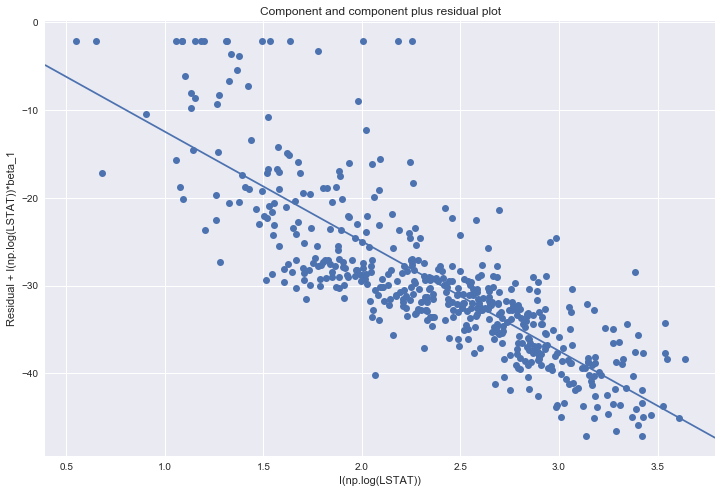

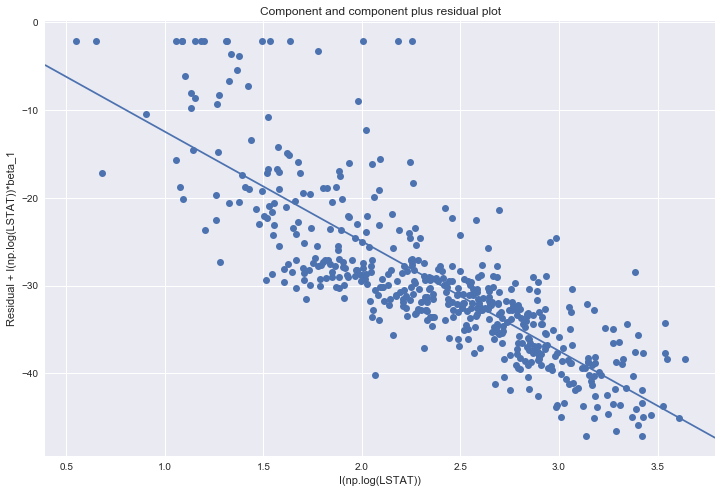

In [28]:
fig, ax = plt.subplots(figsize=(12,8))
sm.graphics.plot_ccpr(mod, "I(np.log(LSTAT))", ax=ax)

In [30]:
mod = ols(formula="""MEDV ~ RM + C(RAD) + LSTAT + I(np.log(LSTAT)) + 1""", data=df).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     122.1
Date:                Wed, 06 Sep 2017   Prob (F-statistic):          3.53e-133
Time:                        21:48:14   Log-Likelihood:                -1507.9
No. Observations:                 506   AIC:                             3040.
Df Residuals:                     494   BIC:                             3091.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           24.7315      3.918      6.312      0.000      17.034      32.429
C(RAD)[T.2.0]        3.5281      1.467      2.406      0.017       0.647       6.410
C(RAD)[T.3.0]        4.6436      1.334      3.482      0.001       2.023       7.264
C(RAD)[T.4.0]        2.2448      1.186      1.893      0.059      -0.085       4.575
C(RAD)[T.5.0]        4.2367      1.174      3.608      0.000       1.930       6.544
C(RAD)[T.6.0]        3.2434      1.452      2.234      0.026       0.391       6.096
C(RAD)[T.7.0]        2.7369      1.592      1.720      0.086      -0.390       5.864
C(RAD)[T.8.0]        4.3731      1.470      2.975      0.003       1.485       7.262
C(RAD)[T.24.0]       1.7490      1.226      1.427      0.154      -0.660       4.158
RM                   3.4671      0.422      8.224      0.000       2.639       4.295
LSTAT                0.3653      0.093      3.909      0.000       0.182       0.549
I(np.log(LSTAT))   -13.2857      1.157    -11.486      0.000     -15.558     -11.013
==============================================================================
Omnibus:                      171.218   Durbin-Watson:                   0.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              841.317
Skew:                           1.413   Prob(JB):                    2.04e-183
Kurtosis:                       8.649   Cond. No.                         303.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Fit Quality

### Leverage

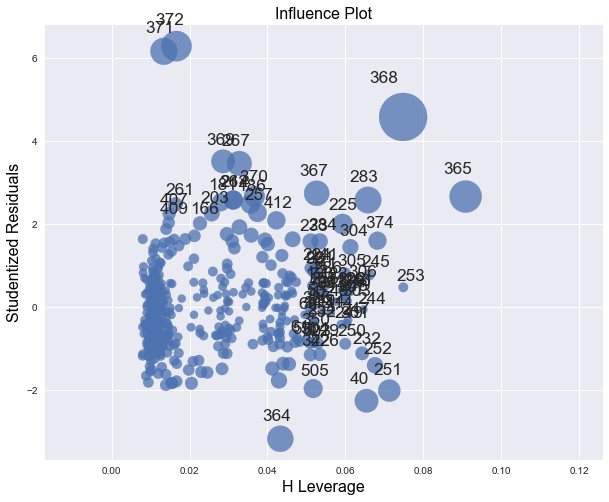

In [31]:
fig, ax = plt.subplots(figsize=(10,8))
fig = sm.graphics.influence_plot(mod, ax=ax, criterion='cooks')

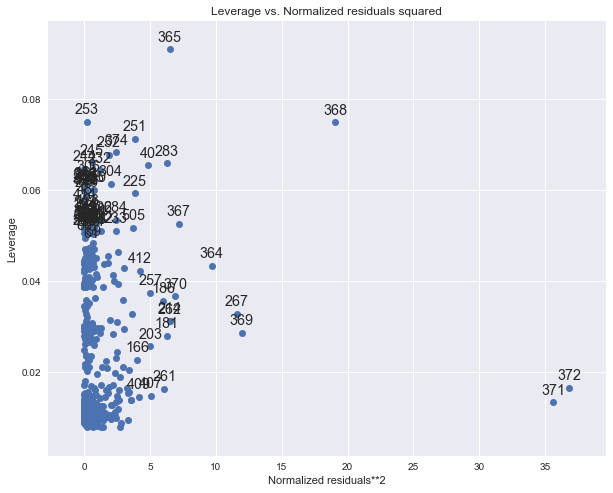

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
fig = sm.graphics.plot_leverage_resid2(mod, ax=ax)

### Partial Regression

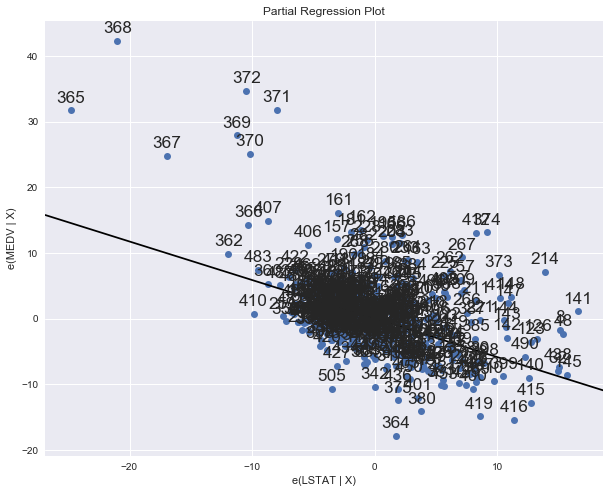

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
fig = sm.graphics.plot_partregress("MEDV", "LSTAT", ["RAD", "RM"], data=df, ax=ax)

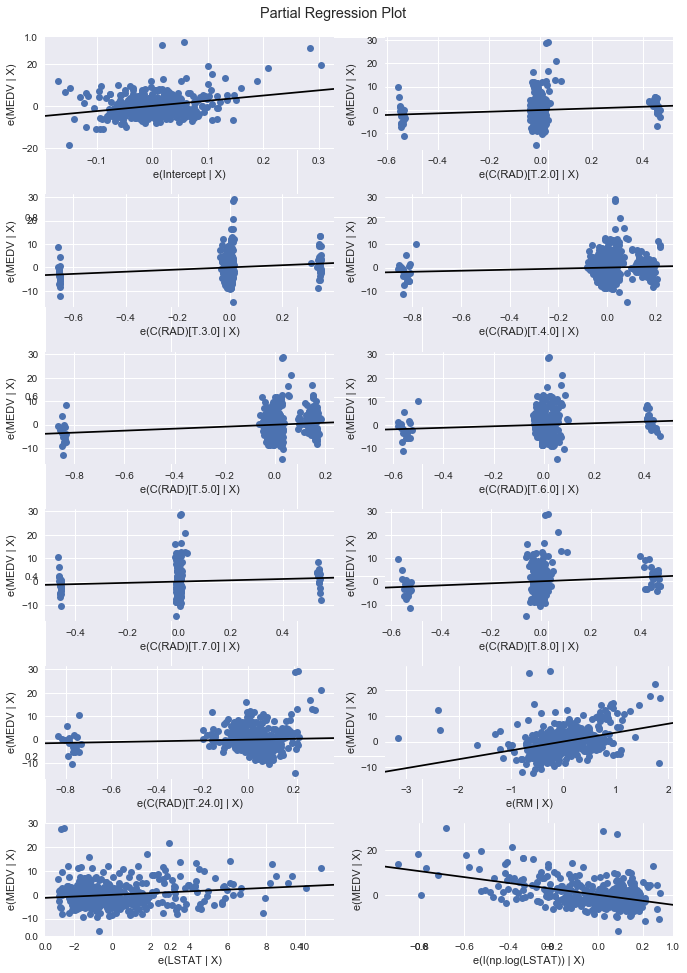

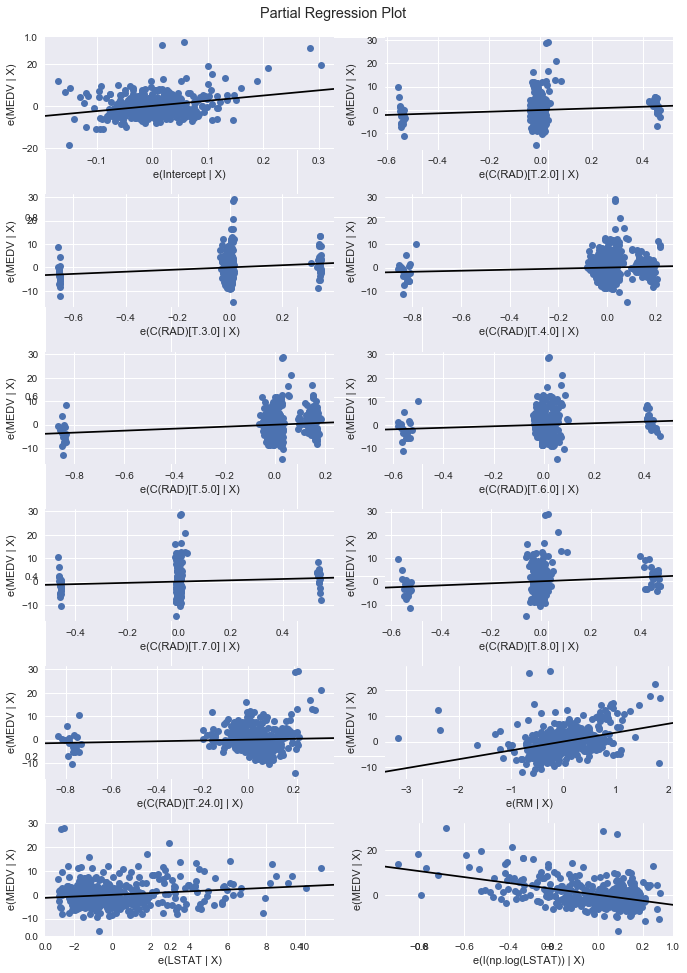

In [34]:
fig, ax = plt.subplots(figsize=(10,14))
sm.graphics.plot_partregress_grid(mod, fig=fig)

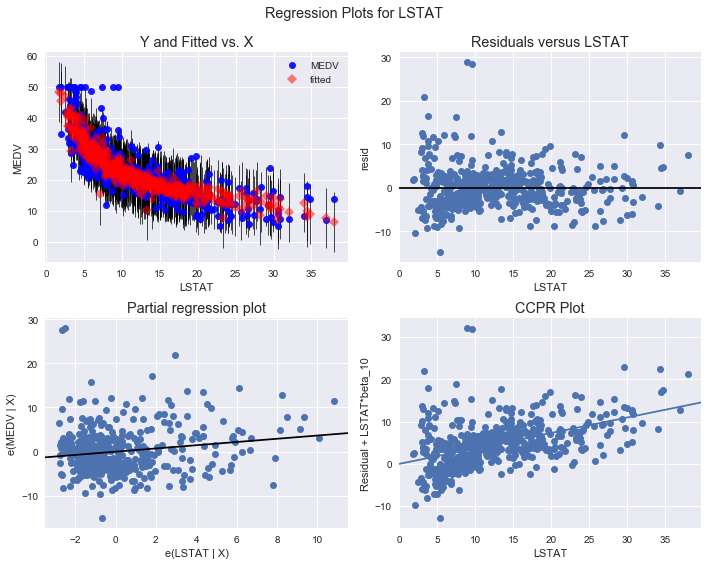

In [36]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(mod, "LSTAT", fig=fig)

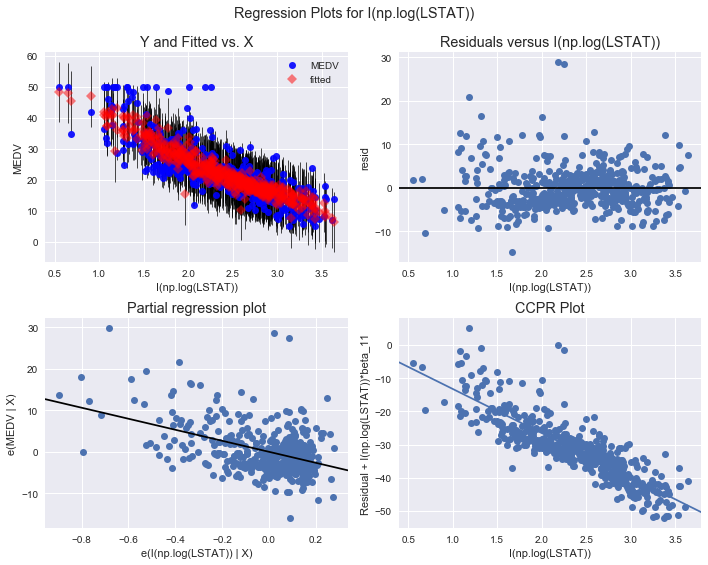

In [37]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(mod, "I(np.log(LSTAT))", fig=fig)

## Conclusion

Using matlpotlib, seaborn, statsmodels, and pandas, a dataset and a model can explored, fit, manipulated, and evaluated through a whole series of fantastic tools.

There are many other excellent libraries that I have not mentioned, e.g. bokeh, mpld3.